# Exploring Lending Club Data

### Summary
**Big Picture Summary:** The purpose of this notebook is to explore certain aspects of the Lending Club Data that was cleaned in the notebook [Data_Wrangling.ipynb](https://github.com/paulb17/Springboard/blob/master/Capstone%20Project%201/Data_Wrangling%20.ipynb). Once the data is explored, it will be used to create a loan classification model for conservative investors in the notebook [Data_Modeling.ipynb](). 

**Explored questions:** As conservative investors are the audience for this project, the questions investigated are in relation to them. These question include:
1. Are Lending Club borrowers risky investments?
2. Manual Investing -  is it better to invest in borrowers with:
    * longer credit histories
    * longer employment histories
    * greater annual income
    * smaller loan requests
3. Will categorizing the employment title column provide useful insights?
4. Do sub-grades impact default risk?

## Importing the data

In [1]:
# importing relevant packages
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

# creating plots using seaborn setting 
sns.set()

# using jupyter magic to display plots in line
%matplotlib inline

# importing the dataset
loan_data = pd.read_csv('Wrangled_Loan_data.csv', low_memory=False)

A quick view of the data is shown below to ensure it was imported correctly

In [2]:
# viewing the size of the dataset
print('The size of the dataset: ' + str(loan_data.shape))

# viewing the first few columns of the dataset
loan_data.head()

The size of the dataset: (39736, 79)


,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,OH,OR,PA,SC,South,TX,VA,WA,WI,West
0,5000.0,10.65,162.87,2.0,7.0,10.0,24000.0,1,27.65,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,15.27,59.83,3.0,14.0,0.0,30000.0,0,1.00,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,15.96,84.33,3.0,15.0,10.0,12252.0,1,8.72,0.0,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,13.49,339.31,3.0,11.0,10.0,49200.0,1,20.00,0.0,...,0,0,0,0,0,0,0,0,0,0
4,3000.0,12.69,67.79,2.0,10.0,1.0,80000.0,1,17.94,0.0,...,0,1,0,0,0,0,0,0,0,0


Next, to get a better understanding of the data that will be used a quick look through the column names and the data types of each column is shown below:

In [3]:
# displaying column names
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39736 entries, 0 to 39735
Data columns (total 79 columns):
loan_amnt                                 39736 non-null float64
int_rate                                  39736 non-null float64
installment                               39736 non-null float64
grade                                     39736 non-null float64
sub_grade                                 39736 non-null float64
emp_length                                39736 non-null float64
annual_inc                                39736 non-null float64
loan_status                               39736 non-null int64
dti                                       39736 non-null float64
delinq_2yrs                               39736 non-null float64
inq_last_6mths                            39736 non-null float64
mths_since_last_delinq                    39736 non-null int64
mths_since_last_record                    39736 non-null int64
open_acc                                  39736 non-

## Data Story

### Are Lending Club Borrowers risky investments?

Prior to investing in Lending Club, it is important for an investor to understand where in the risk spectrum borrowers fall. To evaluate this, we shall take a look at the borrowers FICO scores. 

FICO scores are used by many lenders to determine how risky a borrower is. For this reason, it is expected that the likelihood of a borrower defaulting will decrease as the FICO score increases. Below are graphs showing the proportion of borrowers that defaulted in various FICO score ranges and the distribution of FICO scores.

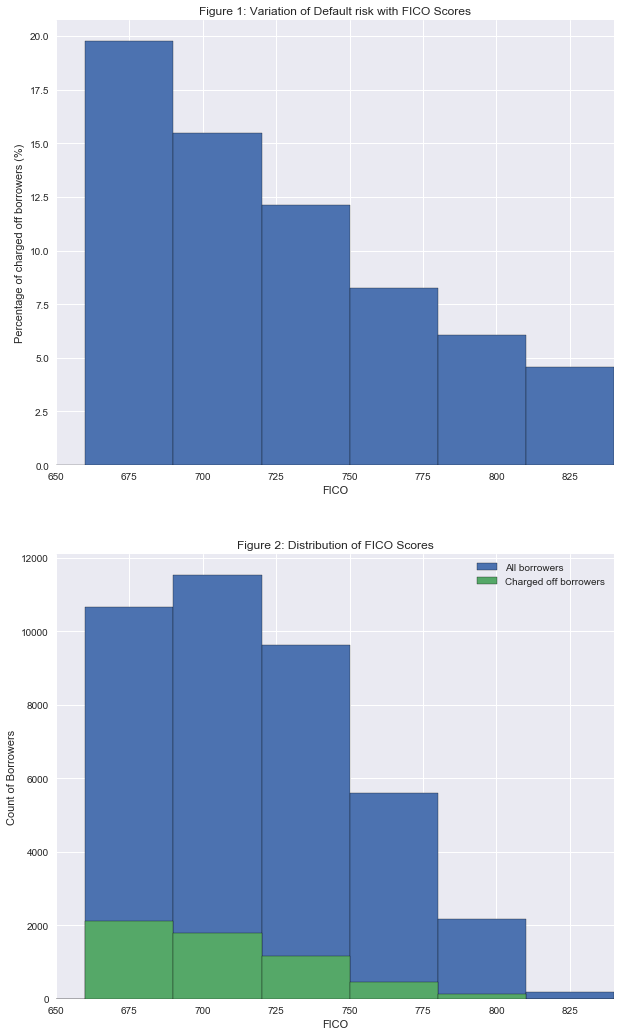

In [4]:
# creating a dataframe of charged off loans
charged_off = loan_data[loan_data['loan_status'] == 0]

# creating empty list for bins and specifying bin widths 
bin_edges = list()
bin_width = 30

# assigning the range of FICO scores to be displayed 
max_el = 840
min_el = 650

# filling in list of bin widths
for num in range(int(round((max_el/bin_width)+1))):
    bin_edges.append((num)*bin_width)

# creating figure
plt.figure(figsize = (10,18))

# plotting distribution of FICO scores
plt.subplot(2,1,2)
plt.title("Figure 2: Distribution of FICO Scores")
plt.xlabel("FICO")
plt.ylabel('Count of Borrowers')
plt.xlim([min_el,max_el])

# counting the number of borrowers in each FICO score category 
counts_tot, bins_tot, bars_tot= plt.hist(loan_data.fico_average, bins = bin_edges, 
                                         label = 'All borrowers', edgecolor = 'k')

# count of the number of borrowers in each FICO score category that were charged off
counts, bins, bars = plt.hist(charged_off['fico_average'], bins = bin_edges, 
                              label = "Charged off borrowers", edgecolor = 'k')

# adding a legend to the plot
plt.legend()

# Make a bar chart showing the proportions of FICO scores
plt.subplot(2, 1, 1)
plt.title("Figure 1: Variation of Default risk with FICO Scores")

# ignoring divisions by 0
with np.errstate(divide='ignore', invalid='ignore'):
     
    proportions = 100*counts/counts_tot
    plt.bar(np.arange(0, max_el, bin_width), height = proportions, width = bin_width, align = 'edge',
            edgecolor = 'black')
    plt.xlim([min_el,max_el])
    plt.xlabel("FICO")
    plt.ylabel("Percentage of charged off borrowers (%)")
    plt.plot(x = bin_edges[-6:], y= proportions[-6:])

As expected, there is a clear trend in Figure 1 showing that the risk of a borrower defaulting decreases as FICO scores increase. We see that the lowest FICO score range (660-690) has a default rate of about 20% while highest FICO score range (810-830) has a default rate of about 5%. We can also see from the figure that Lending Club borowers tend to have FICO scores ranging from 660 to 830.

![title](Fico Score ranges.pdf)

The above table obtained from the [FICO website](https://www.myfico.com/Downloads/Files/myFICO_UYFS_Booklet.pdf), contains descriptions of FICO scores based on categorized ranges. From the table, we can tell that Lending Club borrowers generally have FICO scores that are categorized as good, very good and exceptional. This is a clear indicator that Lending Club attempts to offer investors less risky borrowers. 

Within the selected borrowers available on Lending Club, the FICO score distribution (Figure 2) is rightly skewed. This suggests that most of the borrowers available on the Lending Club market place are in the good FICO score category: a category that consists of borrowers with credit risks less than or approximately equivalent to that of the average U.S. consumer. 

### Manual Investing in Lending Club
Investor in the Lending Club market place have the option to select the borrowers they invest in. With so many borrowers and metrics available it is often difficult to decide which options are most likely to minimize the risk of your investment. Below, we investigate some common metrics investors may want to use when deciding between one borrower or another; especially when borrowers have similar FICO scores. 

#### Borrowers with long credit histories
Credit history is an important component used in the evaluation of a borrowers' credit risk. The FICO score models use a borrower's credit history (age of oldest account, age of newest account and average age of all accounts) in determining credit risk; in fact, borrowers typically require at least 3 years of credit history to be in the exceptional FICO score category.  

To investigate how credit history should impact the decisions of Lending Club investors, we take a look at the distribution and default risk associated with the age of borrowers' oldest credit accounts.

Text(0,0.5,'Percentage of charged off borrowers (%)')

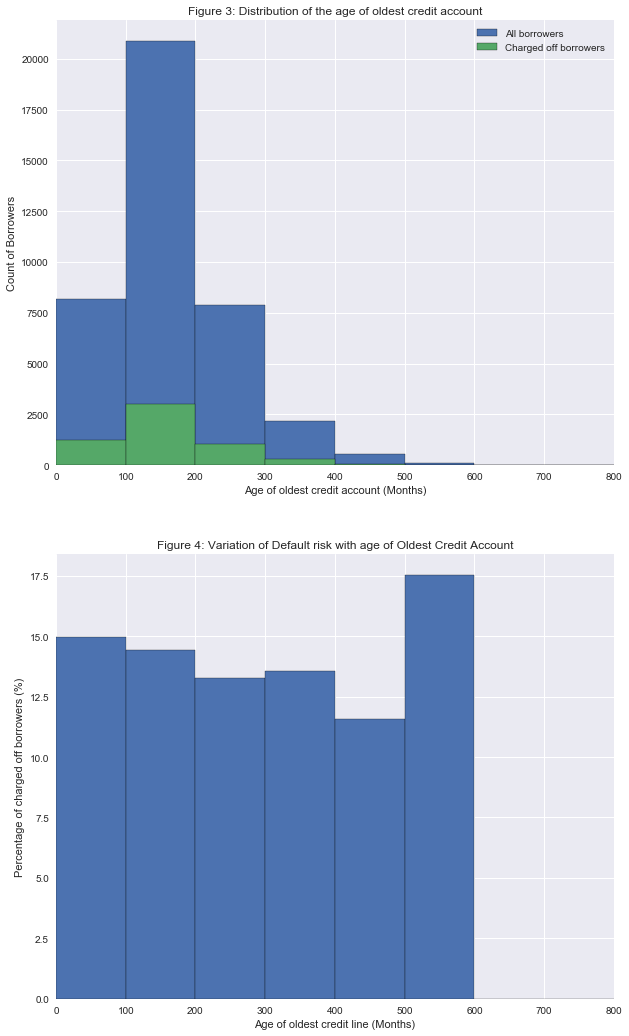

In [5]:
# creating empty list for bins and specifying bin widths
bin_edges = list()
bin_width = 100

# filling in list of bin widths
for num in range(int(round((800/bin_width)+1))):
    bin_edges.append((num)*bin_width)

# creating the figure
plt.figure(figsize = (10,18))

# plotting the distribution of ages of oldest credit account
plt.subplot(2,1,1)
plt.title('Figure 3: Distribution of the age of oldest credit account')
plt.xlabel("Age of oldest credit account (Months)")
plt.ylabel('Count of Borrowers')
plt.xlim([0,800])

# counting the number of borrowers in each age of account group 
counts_tot, bins_tot, bars_tot= plt.hist(loan_data.age_cr_line, bins = bin_edges, 
                                         label = 'All borrowers', edgecolor = 'k')

# count of the number of borrowers in each age of account group that were charged off
counts, bins, bars = plt.hist(charged_off['age_cr_line'], bins = bin_edges, 
                              label = "Charged off borrowers", edgecolor = 'k')

# adding a legend to the plot
plt.legend()

# calculating the proportions 
proportions = 100*counts/counts_tot

# Making a chart showing the proportions 
plt.subplot(2, 1, 2)
plt.bar(np.arange(0, 800, bin_width), height = proportions, width = bin_width, align = 'edge',
        edgecolor = 'black')
plt.title('Figure 4: Variation of Default risk with age of Oldest Credit Account')
plt.xlim([0,800])
plt.xlabel("Age of oldest credit line (Months)")
plt.ylabel("Percentage of charged off borrowers (%)")

As shown in Figure 3, the distribution of the age of borrowers' oldest credit accounts is right skewed. In addition, we can see that most borrowers offered to investors in the Lending Club market place have an oldest credit account aged between 100 to 200 months.

In Figure 4 above, we note that for the first 500 months, the percentage of defaulters *generally* decreases as the age of oldest credit account increases. For borrowers whose oldest credit accounts are aged between 500-600 months, there is a significant increase in the percentage of defaulters. This unexpected deviation from the trend is an indicator that age of oldest credit account on its own is not sufficient to determine a borrowers credit risk. It also explains why the credit history component of the FICO score model accounts for only 15% of a borrowers credit score: other factors which measure how well credit accounts have been managed over time account for the other 85%.

To illustrate the importance of understanding how well accounts have been managed over time, the average number of public record bankruptcies for borrowers in each credit age category will be used. This is because, we expect that people who are able to manage their credit accounts well will have no public record of bankruptcy. While this not a thorough measure of how well credit accounts have been managed, it should provide more insight into the deviation from the trend we see in Figure 4. 

Text(0,0.5,'Percentage of borrowers (%)')

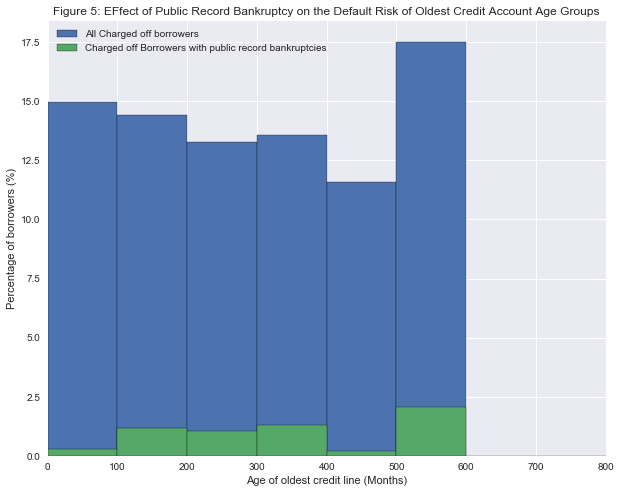

In [6]:
# creating a counter for the number of age groups
age_group_counter = 0

# creating a place holder for credit age groups (CAG)
CAG_all_borrowers = pd.DataFrame()
CAG_charged_off = pd.DataFrame()

# creating a for loop to group borrowers by age group
for index, age in enumerate(bin_edges):   
    
    # checking if all age groups are created
    if age_group_counter == len(bin_edges) - 1:
        break
    
    # creating credit age groups 
    else:
        age_group = loan_data[(loan_data['age_cr_line'] >= bin_edges[index]) &
                              (loan_data['age_cr_line'] < bin_edges[index+1])]
        age_group_counter +=1
        column_name = str(bin_edges[index]) + "-" + str(bin_edges[index+1])
        
        # credit age group for all borrowers
        CAG_all_borrowers[column_name] = age_group.mean()
        
        # credit age group for charged_off borrowers
        CAG_charged_off[column_name] = age_group[age_group.loan_status == 0].mean()

        
# calculating proportion of charged of borrowers with public record benakruptcies
prop = 100*CAG_charged_off.loc['pub_rec_bankruptcies', :]*proportions/100

# Making histogram
fig, ax1 = plt.subplots(figsize = (10,8))

plt.bar(np.arange(0, 800, bin_width), height = proportions, width = bin_width, align = 'edge',
        edgecolor = 'black', label = 'All Charged off borrowers')
plt.bar(np.arange(0, 800, bin_width), height = prop,  width = bin_width, align = 'edge', 
        edgecolor = 'black', label = 'Charged off Borrowers with public record bankruptcies')

plt.legend()


plt.title('Figure 5: EFfect of Public Record Bankruptcy on the Default Risk of Oldest Credit Account Age Groups')
plt.xlim([0,800])
plt.xlabel("Age of oldest credit line (Months)")
plt.ylabel("Percentage of borrowers (%)")


In Figure 5 above, we see that the porportion of charged off borrowers appears to correlate with the default risk for oldest credit accounts aged between 100 to 600 months. We also note that borrowers with public record bankruptcies have a less significant contribution to the default risk for oldest credit accounts aged 0-100 months and 400-500 months.

Figure 5 shows us that the proportion of charged off borrowers with public record bankruptcies is highest for borrowers with credit accounts aged between 500-600 months. It is clear that these borrowers are in part responsible for the significant deviation in the trend observed in Figure 4. To get an understanding of why this is the case, we plot the proportion of borrowers in each oldest credit account age group below.

Text(0,0.5,'Percentage of borrowers (%)')

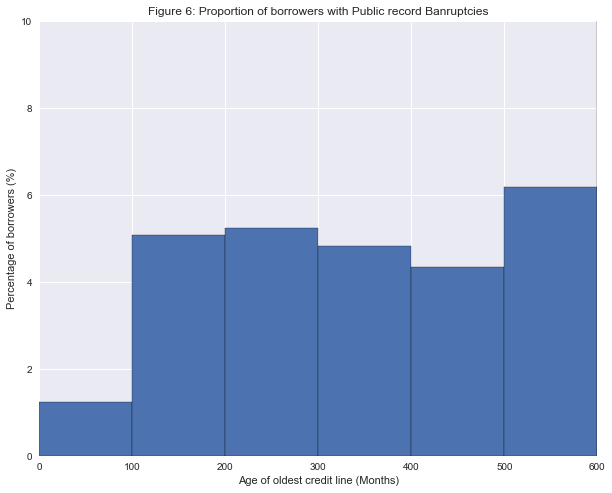

In [7]:
# Making Figure 6
plt.figure(figsize = (10,8))
plt.bar(np.arange(0, 800, bin_width), height = 100*CAG_all_borrowers.loc['pub_rec_bankruptcies', :], 
        width = bin_width, align = 'edge', edgecolor = 'black')

plt.title('Figure 6: Proportion of borrowers with Public record Banruptcies')
plt.xlim([0,600])
plt.ylim([0,10])
plt.xlabel("Age of oldest credit line (Months)")
plt.ylabel("Percentage of borrowers (%)")


It should be noted that Figure 6 exculdes borrowers with oldest credit accounts aged between 600-700 months and 700-800 months. This is because these categories consists of two and four people, respectively.

Figure 6 shows that borrowers with oldest credit accounts aged between 500-600 months have the greatest proportion of people with a public record bankruptcy. This means there is a higher probability that a borrower charged off in the 500-600 months age of oldest credit account group will have a public record bankriptcy; in fact, this explains why these borrowers have the highest proportion of charged off borrowers with public record bankruptcies in Figure 5. Evidently, it will be advantageous for investors to consider other factors alongside credit history when making investment decisions. Simply investing in borrowers with the longest credit histories could lead to an increase in the risk of default within an investors portfolio.

A more thorough evaluation of what is causing the deviation observed in Figure 4 can be ahcieved by reviewing borrowers' reasons for taking the loan. Let's do this below.

In [8]:
purpose = [
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_other',
 'purpose_small_business',
 'purpose_wedding']

Contributions = CAG_charged_off.loc[purpose, :]*proportions
Contributions.iloc[:,:-2]

,0-100,100-200,200-300,300-400,400-500,500-600
purpose_credit_card,1.270307,1.351934,1.586093,1.207617,1.627486,1.030928
purpose_debt_consolidation,6.534750,7.296611,7.029565,6.595448,5.063291,6.185567
purpose_home_improvement,0.598510,0.910878,0.837457,1.532745,1.084991,4.123711
purpose_major_purchase,0.830585,0.556115,0.367974,0.232234,0.542495,0.000000
purpose_other,2.149750,1.567669,1.154676,1.532745,0.904159,1.030928
purpose_small_business,1.258092,1.208112,1.103921,1.254064,1.446655,2.061856
purpose_wedding,0.415293,0.230116,0.139576,0.092894,0.180832,0.000000


The table above shows the percentage of borrowers in each age group that was charged off. 

A visual inspection of the table reveals that the major cause of the increase in default risk of borrowers with oldest credit accounts aged between 500-600 months arises from the people who borrow money for home improvement: the 4.1% contribotion for the 500-600 months age of oldest account category is much higher than the 0.5% -1.5% contributions we see from other age of oldest credit account categories. We also note that a less significant contributor to the increase in default riks in the 500-600 age of credit accounts category is borrowers requesting money for small businessis. 

To understand why borrowers who are trying to improve their homes play such a significant role in the defatult risk for oldest credit accounts aged between 500-600 months, we shall investigate the number of people that own their place of residence in each credit age category. This is because we expect that borrowers who own thier homes are more likely to attempt to improve it.

Text(0,0.5,'Percentage of borrowers who own their homes(%)')

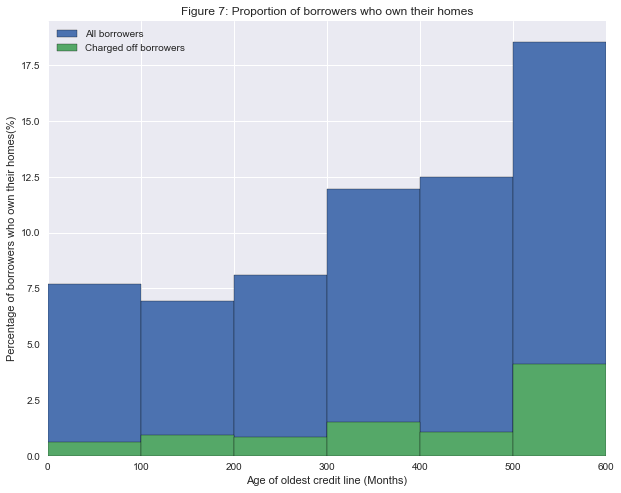

In [9]:
# Creating Figure 7
plt.figure(figsize = (10,8))
plt.bar(np.arange(0, 800, bin_width), width = bin_width, 
        height = 100*CAG_all_borrowers.loc['home_ownership_OWN',:], align = 'edge', 
        edgecolor = 'black', label = 'All borrowers')
plt.bar(np.arange(0, 800, bin_width), width = bin_width, 
        height = Contributions.loc['purpose_home_improvement',:], align = 'edge', 
        edgecolor = 'black', label = 'Charged off borrowers ')
plt.legend()
plt.title('Figure 7: Proportion of borrowers who own their homes')
plt.xlim([0,600])
plt.xlabel("Age of oldest credit line (Months)")
plt.ylabel("Percentage of borrowers who own their homes(%)")



We see in Figure 7 that there is a significant increase in the percentage of the borrowers that own their own homes in the 500-600 month age of oldest credit line category. It stands to reason that this increase made it more probable that a charged off borrower will be a person attempting to improve their home. 

#### Borrowers with longer employment lengths
It is believed that borrowers with longer lengths of employment are less likely to default on loans. This is because long employment lengths are an indicator of a stable income. Similar to before, we show the two plots below to begin investigating this:
* Figure 8 shows the distribution of employment length
* Figure 9 shows proportion of borrowers that defaulted in each employment length category.

Text(0,0.5,'Percentage of charged off borrowers (%)')

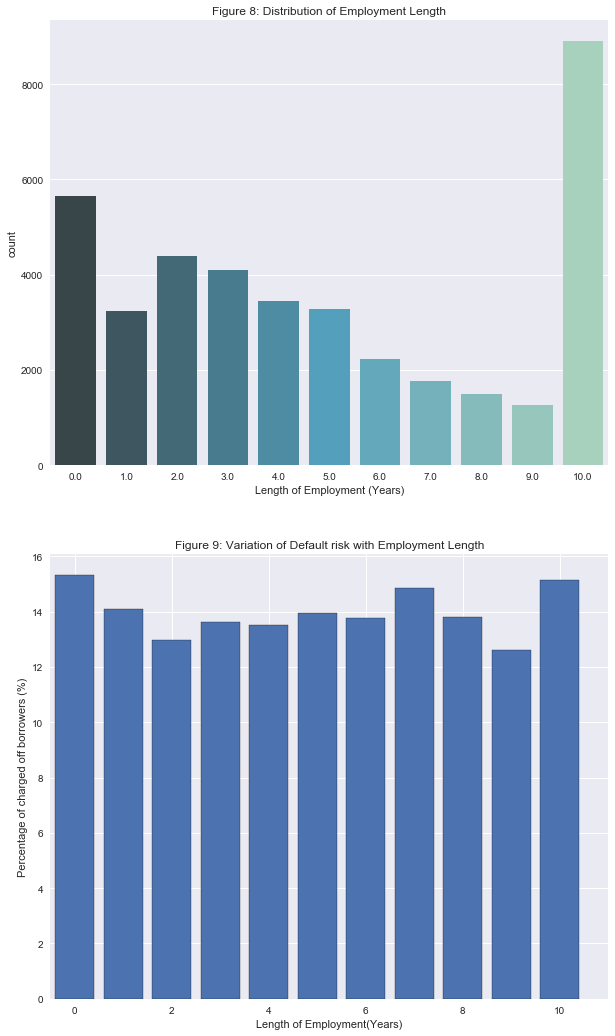

In [10]:
# creating a dataframe of charged off loans
charged_off = loan_data[loan_data['loan_status'] == 0]

# count of the number of people of each employment length that were charged off
count_charged_off  = charged_off['emp_length'].value_counts().sort_index()

# counting the number of people of each employment 
count_total = loan_data.emp_length.value_counts().sort_index()

# calculating the proportiong of people of each employment length 
proportion = 100*count_charged_off/count_total


# creating graphs 
plt.figure(figsize = (10,18))

# plotting the distribution of employment length
plt.subplot(2,1,1)
plt.title('Figure 8: Distribution of Employment Length')
sns.countplot(x = 'emp_length', data=loan_data, palette='GnBu_d')
plt.xlabel('Length of Employment (Years)')

# plotting a chart showing the proportiong of people charged off in each category
plt.subplot(2,1,2)
bin_width = 0.8
plt.bar(np.arange(0, 11, 1), height = proportion, width = bin_width, align = 'center',
        edgecolor = 'black')
plt.xlim([-0.5,11])
plt.title('Figure 9: Variation of Default risk with Employment Length')
plt.xlabel("Length of Employment(Years)")
plt.ylabel("Percentage of charged off borrowers (%)")



The employment length distribution shown in Figure 8 is trimodal. The mode on the right end of the distribution consists of people with 10 or more years of employment. A majority of borrowers in the Lending Club marketplace fall into this category. 

In Figure 9, we see that there is no trend between the employment length and the percentage of borrowers that defaulted. While this is different from what was expected, it is in agreement with the findings of the Fair Isaac Corporation (FICO): FICO score models do not make use of employment history information as it was found not to be predictive of future credit performance. It will therefore be an unreasonable investment strategy to select borrowers based on employment lengths.

#### Borrowers with larger annual incomes
Similar to the length of employment, FICO score models do not make use of annual income in computing a borrower's credit score as they have found it does not predict future credit performance. It is worth investigating whether this findings hold for the Lending Club dataset.

Text(0,0.5,'Percentage of charged off borrowers (%)')

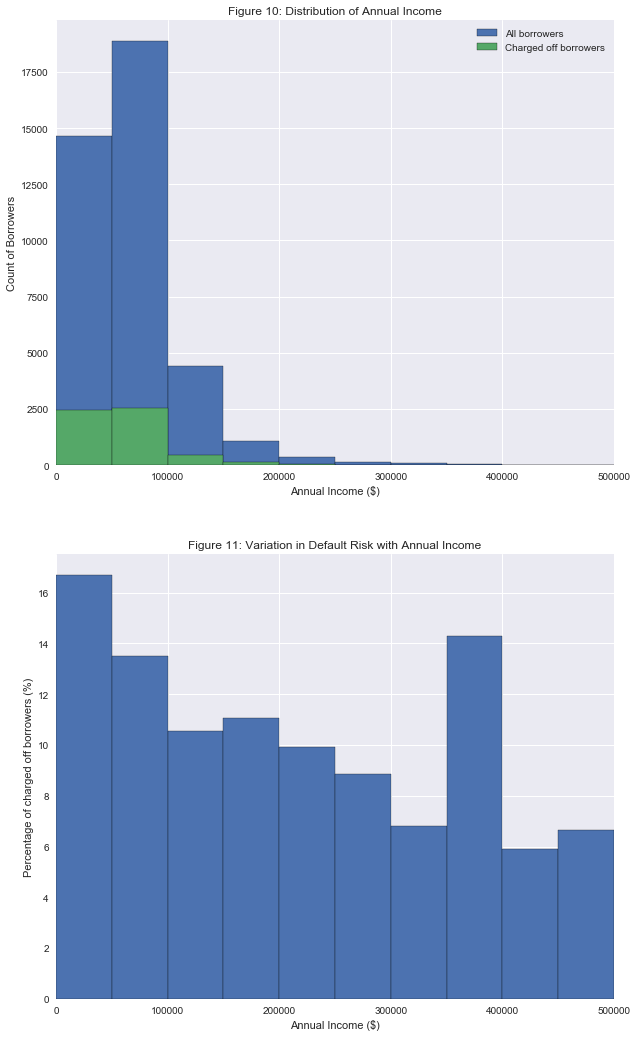

In [11]:
# creating a dataframe of charged off loans
charged_off = loan_data[loan_data['loan_status'] == 0]

# creating empty list for bin edges and specifying bin width
bin_edges = list()
bin_width = 50000

# choosing the maximum x axis display
max_el = 500000

# filling in list of bin widths
for num in range(int(round((max_el/bin_width)+1))):
    bin_edges.append((num)*bin_width)

# creating the figure
plt.figure(figsize = (10,18))

# plotting the distribution of annual income
plt.subplot(2,1,1)
plt.title('Figure 10: Distribution of Annual Income')
plt.xlabel("Annual Income ($)")
plt.ylabel('Count of Borrowers')
plt.xlim([0,max_el])

# counting the number of borrowers in each annual income category
counts_tot, bins_tot, bars_tot= plt.hist(loan_data.annual_inc, bins = bin_edges, 
                                         label = 'All borrowers', edgecolor = 'k')

# count of the number of borrowers in each annual income category that were charged off
counts, bins, bars = plt.hist(charged_off['annual_inc'], bins = bin_edges, 
                              label = "Charged off borrowers", edgecolor = 'k')

# displaying a legend on the plot
plt.legend()

# calculating the proportions of borrowers charged off in each category
proportions = 100*counts/counts_tot

# Make a bar chart showing the proportions 
plt.subplot(2, 1, 2)
plt.bar(np.arange(0, max_el, bin_width), height = proportions, width = bin_width, align = 'edge',
        edgecolor = 'black')
plt.title('Figure 11: Variation in Default Risk with Annual Income')
plt.xlim([0,max_el])
plt.xlabel("Annual Income ($)")
plt.ylabel("Percentage of charged off borrowers (%)")

It should be noted that in figures 10 and 11 only incomes less than \$500,000 are shown and analyzed. Incomes above $500,000 were excluded because they are few and make the graphs difficult to read.

We see from Figure 10 that the income distribution is right skewed with most borrowers earning between \$50,000 to \$100,000. 

The graphs in Figure 11 shows that the risk of borrowers defaulting generally decreases as annual incomes increase for borrowers earning between \$0 to \$350,000. Oddly borrowers earning between \$350,000 to \$400,000 deviate from this trend. It is worth noting that the significant deviation in the general decline occurs for annual incomes in which the count of borrowers is relatively small :

|   Annual Income ($)   | Count of people in category   | Count of people charged off     |
|-----------------------|-------------------------------|---------------------------------|
|  350,000 - 400,000    |               35              |             5                   |
|  400,000 - 450,000    |               17              |             1                   |
|  450,000 - 500,000    |                8              |             1                   |

It is possible that the deviation is not statistically significant. In other words, if we take the whole population of borrowers earning \$350,000 - $400,000 annual income in the peer to peer market place the percentage of defaulters could be lower. Let's investigate this using a hypothesis test

**Hypothesis test** 
The null and alternative hypothesis are stated below:
* H<sub>0</sub>: p = 0.063 
* H<sub>1</sub>: p > 0.063

where,
 - p is the population proportion of charged off borrowers in the \$350,000 - \$400,000 income category

We assume p is the average of the proportion of charged off borrowers in the \$300,000 - \$350,000 annual income category (0.068) and the \$400,000 - \$450,000 annual income category (0.059). A 5% significant level will be used for the test.

In [12]:
# creating a numpy array of charged off borrowers ($350K -$400K income)
array = loan_data[(loan_data.annual_inc >= 350000) & 
                     (loan_data.annual_inc < 400000)].loan_status.values

# creating empty array for bootstrap replicates
size = 10000
permutation_replicates = np.empty(size)

# calculating population proportion and shifted array
means = ((counts[6]/counts_tot[6]) + (counts[8]/counts_tot[8]))/2
shifted_array = array - (1-np.mean(array)) + means 

# filling in the permutation replicates via bootstrap sampling  
for i in range(len(permutation_replicates)):
    
    bootstrap_sample = np.random.choice(shifted_array, size=len(shifted_array))      
    permutation_replicates[i] = np.mean(bootstrap_sample)

# calculating p-value
p_val = np.sum(permutation_replicates >= np.mean(array))/len(permutation_replicates)

# defining siginificance leve
sig_level = 0.05

if p_val < sig_level:
    print('Result not significant: p-value (' + str(p_val) +') < 0.05')
else:
    print('Result is significant: p-value (' + str(p_val) +') > 0.05')

Result is significant: p-value (0.1064) > 0.05


We see from the above result that we fail to reject the null hypothesis. This is because if the population proportion was actually 0.063, we would expect to observe a proportion greater than or equal to 0.142 over 10% of the time in a sample size of 35 borrowers. Consequently, the deviation observed in the \$350,000 - $400,000 income category is potentially due to random chance. 

Based on the result of the hypothesis test, it is reasonable for investors to use a borrower's annual income as a metric to judge default risk. However, it may be beneficial for conservative investors to be cautious about loaning money to annual income groups with few borrowers. Overall it will likely be advantageous to combine annual income with another metric when trying to minimize risk. 

### Borrowers requesting smaller loans
Larger loan amounts typically means larger installments. Having consistently large financial obligations can be difficult to manage particularly if costly emergencies arise. For this reason, it is expected that greater loan amounts will have more defaults. 

Text(0.5,1,'Figre 13: Variation of Loan amounts with Default risk')

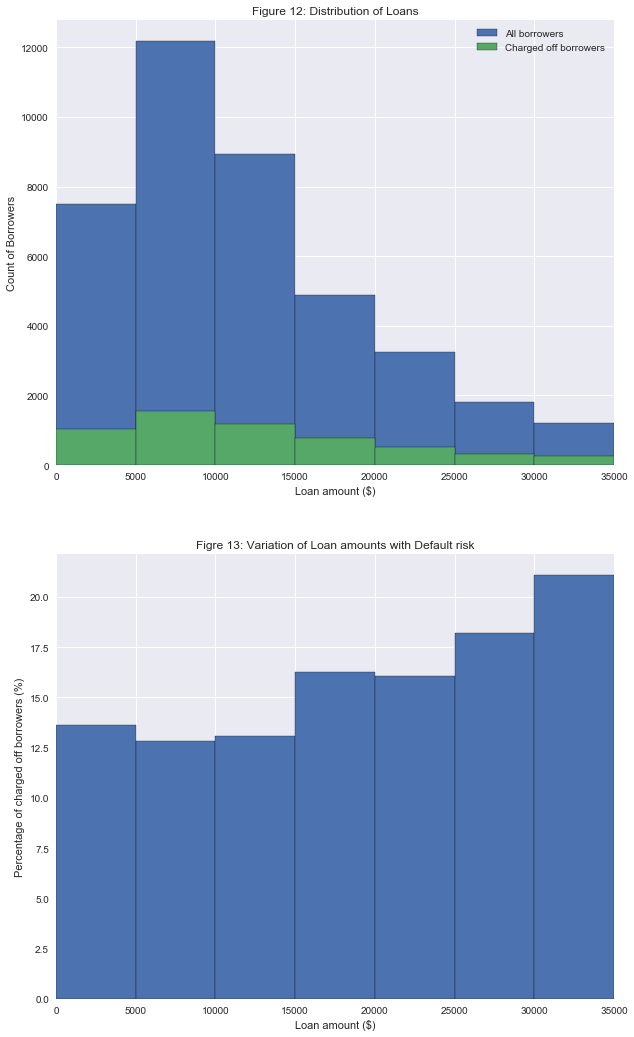

In [13]:
# creating a dataframe of charged off loans
charged_off = loan_data[loan_data['loan_status'] == 0]

# creating empty list for bin edges and specifying bin width
bin_edges = list()
bin_width = 5000

# creating the maximum x axis display
max_el = loan_data.loan_amnt.max()

# filling 
for num in range(int(round((max_el/bin_width)+1))):
    bin_edges.append((num)*bin_width)

# creating figure
plt.figure(figsize = (10,18))

# plotting distribution of loan amounts
plt.subplot(2,1,1)
plt.xlabel("Loan amount ($)")
plt.ylabel('Count of Borrowers')
plt.xlim([0,max_el])
plt.title("Figure 12: Distribution of Loans")

# counting the number of people of each age in the dataset
counts_tot, bins_tot, bars_tot= plt.hist(loan_data.loan_amnt, bins = bin_edges, 
                                         label = 'All borrowers', edgecolor = 'k')

# count of the number of borrowers that were charged off
counts, bins, bars = plt.hist(charged_off['loan_amnt'], bins = bin_edges, 
                              label = "Charged off borrowers", edgecolor = 'k')

# adding a legend to the plot
plt.legend()

# calculating the proportions of loan amounts charged off
proportions = 100*counts/counts_tot

# Make a bar chart showing the proportions of loan amounts in each category that was charged off
plt.subplot(2, 1, 2)
plt.bar(np.arange(0, max_el, bin_width), height = proportions, width = bin_width, align = 'edge',
        edgecolor = 'black')
plt.xlim([0,max_el])
plt.xlabel("Loan amount ($)")
plt.ylabel("Percentage of charged off borrowers (%)")
plt.title('Figre 13: Variation of Loan amounts with Default risk')

In Figure 12, we can see that the loan distribution is right skewed and that most of the borrowers offered on Lending Club market place request a loan amount between \$5,000 to $10,000.   

From Figure 13 we note that as the loan amount increases, there is a general increase in the percentage of defaulters. As expected, this suggests that it is less risky to invest in borrowers requesting smaller loan amounts.

## Will categorizing the employer title column provide useful insights?
In the uncleaned Lending Club Dataset borrowers provided their employer title. As the responses borrowers provided were not selected from a categorized list, cleaning the employer title column will take considerable time. In order to avoid spending a lot of time working on this, only ~15% of the employer title column was categorized. In this section, we use the categorization performed to evaluate the usefulness of categorizing selected employer titles. 

emp_title_cat_Educational Institutions    0.107871
emp_title_cat_Major Retailers             0.172872
emp_title_cat_No response                 0.196914
emp_title_cat_Tech companies (FAANG)      0.083333
emp_title_cat_US Military                 0.140000
emp_title_cat_Uncategorized employer      0.141192
emp_title_cat_self_employed               0.186170
emp_title_cat_unemployed                  0.191489
dtype: float64

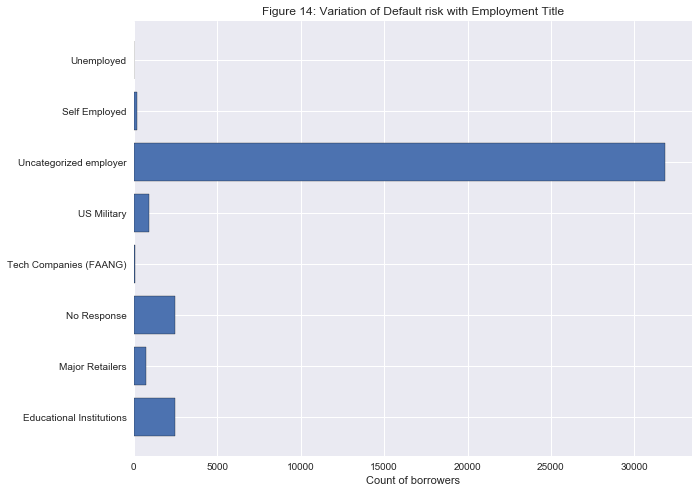

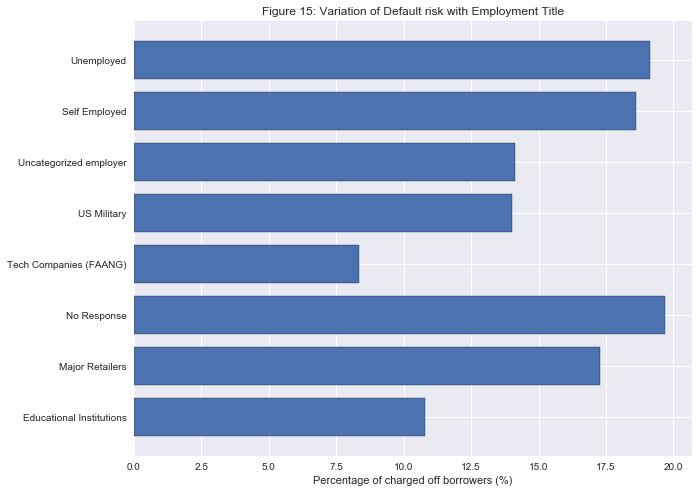

In [14]:
# creating list of employer titles
emp_titles = list()

for emp_title in loan_data.columns.tolist():
    if 'emp_title_cat' in emp_title:
        emp_titles.append(emp_title)

# counting the number of borrowers in each employment title category 
emp_title_count = loan_data[emp_titles].sum() 

# plotting a chart showing the count of people in each employment title category
fig, ax = plt.subplots(figsize=(10,8))
bin_width = 0.8
plt.barh(np.arange(0, 8, 1), width = emp_title_count, height = 0.75, align = 'center',
        edgecolor = 'black')

plt.title('Figure 14: Variation of Default risk with Employment Title')
plt.xlabel("Count of borrowers")

# formatting employment titles displayed
formatted_emp_title = ['Educational Institutions','Major Retailers', 'No Response',
                       'Tech Companies (FAANG)', 'US Military','Uncategorized employer',
                       'Self Employed', 'Unemployed']
plt.yticks(np.arange(0, 8, 1), formatted_emp_title)

# calculating proportions
emp_title_df = loan_data[emp_titles]
proportions = emp_title_df[loan_data.loan_status == 0].sum()/emp_title_df.sum()

# plotting aproportiong of people charged off in each category
fig, ax = plt.subplots(figsize=(10,8))
bin_width = 0.8
plt.barh(np.arange(0, 8, 1), width = 100*proportions, height = 0.75, align = 'center',
        edgecolor = 'black')

plt.title('Figure 15: Variation of Default risk with Employment Title')
plt.xlabel("Percentage of charged off borrowers (%)")

# formatting employment titles displayed
formatted_emp_title = ['Educational Institutions','Major Retailers', 'No Response',
                       'Tech Companies (FAANG)', 'US Military','Uncategorized employer',
                       'Self Employed', 'Unemployed']
plt.yticks(np.arange(0, 8, 1), formatted_emp_title)

proportions

In Figure 14 we see that only a small fraction of the employment title column was categorized. Figure 15 suggests that there may be significant differences in the proportion of charged off borrowers when categorized by employer titles. Let's further investigate this using a t-test.

### t-test on the proportion of charged off borrowers in each employment title category
The null and alternative hypothesis are stated below:
* H<sub>0</sub>: p - p<sub>0</sub> = 0 
* If p<sub>0</sub> > p, H<sub>1</sub>: p - p<sub>0</sub> < 0
* If p<sub>0</sub> < p, H<sub>1</sub>: p - p<sub>0</sub> > 0

where
- p is the population proportion of charged off borrowers in the Lendinc Club loan dataset (0.142).
- p<sub>0</sub> is the observed proportion of charged off borrowers by employment title.

The hypothesis test will be carried out at the 5% significant level.

In [15]:
# calculating p
p = len(charged_off)/len(loan_data)

# calculating number of borrowers in population
n = len(loan_data)

# creating a dataframe to store test results
T_test_results = pd.DataFrame()

# creating a for loop to calculate p-value and compare it to significance level
for emp_title in emp_titles:
    
    # extracting observed proportions and sample size
    p_0 = proportions.loc[emp_title]
    n_0 = emp_title_df[emp_title].sum()
    
    # calculating z-score
    Z_score = (p-p_0)/np.sqrt((p*(1-p)/n))
    
    # checking whether it is an upper or lower tail test
    if Z_score < 0:
        
        # defining significance level
        sig_level = 0.05
        
        # calculating the p-value
        p_value_t = st.t.cdf(Z_score, df=n-1)
        
        # adding results to dataframe
        if p_value_t < sig_level:
            T_test_results.loc[emp_title, 'Result'] = 'Significant'
            T_test_results.loc[emp_title, 'Explanation'] = 'p-value (' + str(p_value_t) + ') < 0.05'
        else:
            T_test_results.loc[emp_title, 'Result'] = 'Not Significant'
            T_test_results.loc[emp_title, 'Explanation'] = 'p-value (' + str(p_value_t) + ') > 0.05'

            
    elif Z_score > 0:
        
        # defining significance level
        sig_level = 0.95
        
        # calculating the p-value
        p_value_t = st.t.cdf(Z_score, df=n-1)
        
        # printing results
        if p_value_t > sig_level:
            T_test_results.loc[emp_title, 'Result'] = 'Significant'
            T_test_results.loc[emp_title, 'Explanation'] = 'p-value (' + str(p_value_t) + ') > 0.95'
        else:
            T_test_results.loc[emp_title, 'Result'] = 'Not Significant'
            T_test_results.loc[emp_title, 'Explanation'] = 'p-value (' + str(p_value_t) + ') < 0.95'

T_test_results

,Result,Explanation
emp_title_cat_Educational Institutions,Significant,p-value (1.0) > 0.95
emp_title_cat_Major Retailers,Significant,p-value (3.03634497401e-68) < 0.05
emp_title_cat_No response,Significant,p-value (4.82891520509e-211) < 0.05
emp_title_cat_Tech companies (FAANG),Significant,p-value (1.0) > 0.95
emp_title_cat_US Military,Not Significant,p-value (0.90425006136) < 0.95
emp_title_cat_Uncategorized employer,Not Significant,p-value (0.734278342855) < 0.95
emp_title_cat_self_employed,Significant,p-value (1.34688837781e-137) < 0.05
emp_title_cat_unemployed,Significant,p-value (4.87487344677e-172) < 0.05


The results shown in the above table suggest that 6 of the 8 employment title categories have significantly different proportions of charged off borrowers relative to the population proportion of charged off borrowers. We note that it is reasonable for the uncategorized employer category not to be significantly different from the population results as it is currently composed of over 80% of the loan dataset. Given the results, it will likely be beneficial to fully categorize the employment title column as it could be useful to conservative investors.

## Do Sub-grades matter? 
Lending Club categorize borrowers based on grades and sub grades. The grades are lettered A through G, with the letter A representing the least risky borrowers to invest in, and the letter G representing the most risky borrowers to invest in. The sub-grades are numbered 1 through 5 with the number 1 for the borrowers within a grade that are less likely to default and the number 5 for those more likely to default. 

In this section, we hope to gain some insight into whether investing based on sub-grades can help reduce an investors risk. To this end, we plot graphs to show the distribution and default risks associated with grades and sub-grades. In the graphs each grade and sub-grade is ranked using a numbering system in which larger numbers denotes the borrowers that are more risky to invest in.

(0.5, 7.5)

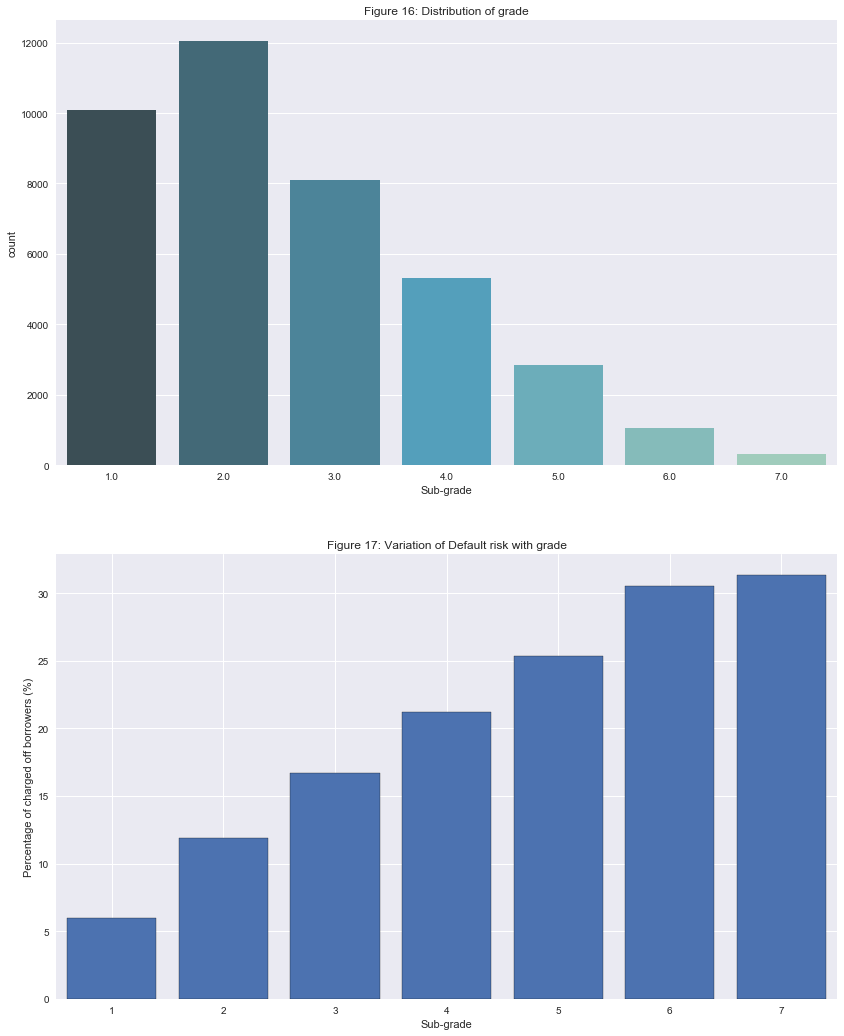

In [16]:
# creating a dataframe of charged off loans
charged_off = loan_data[loan_data['loan_status'] == 0]

# count of the number of people of each employment length that were charged off
count_charged_off  = charged_off['grade'].value_counts().sort_index()

# counting the number of people of each employment 
count_total = loan_data.grade.value_counts().sort_index()

# calculating the proportiong of people of each employment length 
proportion = 100*count_charged_off/count_total


# creating graphs 
plt.figure(figsize = (14,18))

# plotting the distribution of employment length
plt.subplot(2,1,1)
plt.title('Figure 16: Distribution of grade')
sns.countplot(x = 'grade', data=loan_data, palette='GnBu_d')
plt.xlabel('Sub-grade')

# plotting a chart showing the proportiong of people charged off in each category
plt.subplot(2,1,2)
bin_width = 0.8
plt.bar(np.arange(1, 8, 1), height = proportion, width = bin_width, align = 'center',
        edgecolor = 'black')
plt.title('Figure 17: Variation of Default risk with grade')
plt.xlabel("Sub-grade")
plt.ylabel("Percentage of charged off borrowers (%)")
plt.xlim([0.5,7.5])



We see in figure 16 that the distribution of grades is right skewed indicating that a majority of borrowers in the Lending Club market place have grade A or B loans. Figure 17 shows that the risk of a borrower defaulting increases as grades increase; this is expected. 

(0.5, 35.5)

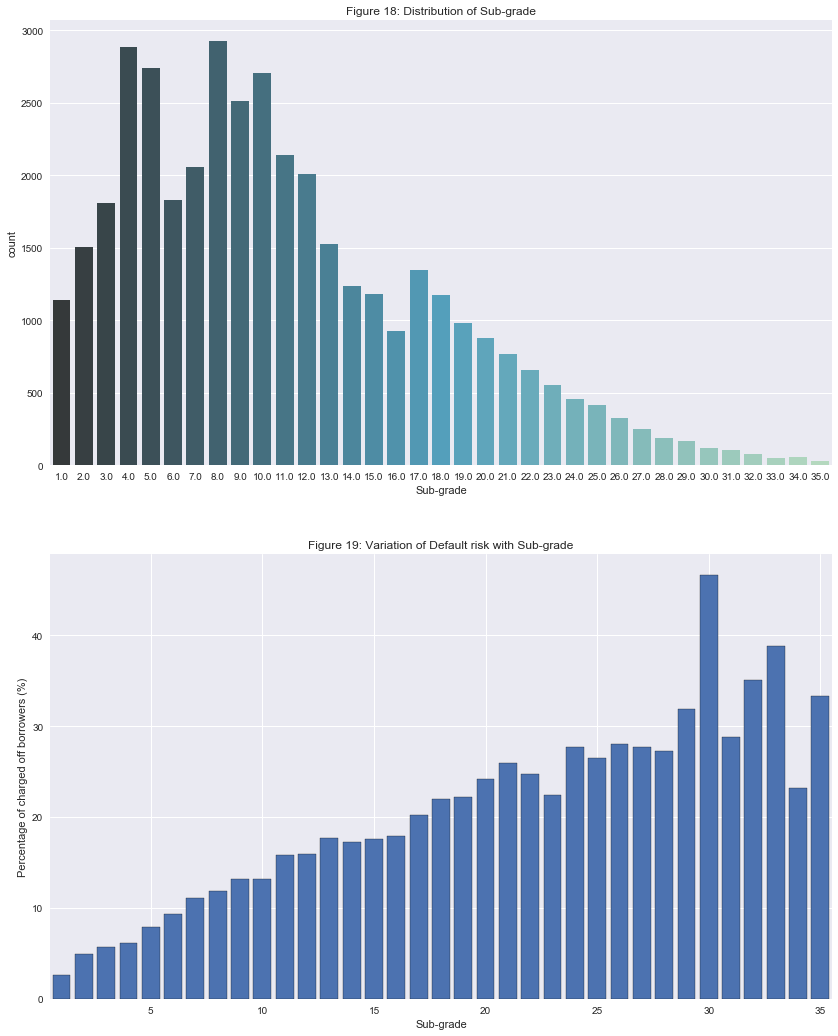

In [17]:
# creating a dataframe of charged off loans
charged_off = loan_data[loan_data['loan_status'] == 0]

# count of the number of people of each employment length that were charged off
count_charged_off  = charged_off['sub_grade'].value_counts().sort_index()

# counting the number of people of each employment 
count_total = loan_data.sub_grade.value_counts().sort_index()

# calculating the proportiong of people of each employment length 
proportion = 100*count_charged_off/count_total


# creating graphs 
plt.figure(figsize = (14,18))

# plotting the distribution of employment length
plt.subplot(2,1,1)
plt.title('Figure 18: Distribution of Sub-grade')
sns.countplot(x = 'sub_grade', data=loan_data, palette='GnBu_d')
plt.xlabel('Sub-grade')

# plotting a chart showing the proportiong of people charged off in each category
plt.subplot(2,1,2)
bin_width = 0.8
plt.bar(np.arange(1, 36, 1), height = proportion, width = bin_width, align = 'center',
        edgecolor = 'black')
plt.title('Figure 19: Variation of Default risk with Sub-grade')
plt.xlabel("Sub-grade")
plt.ylabel("Percentage of charged off borrowers (%)")
plt.xlim([0.5,35.5])


We see in figure 18 a more datailed distribution of of the grades, the sub-grade distribution. We note that the sub-grade distribution is trimodal. We also note from Figure 19 that there is a general increase in default risk as sub-grade increases, for sub-grades labelled less than the number 22 (D2). For sub grades ranked more risky than D2, there is no clear pattern. This indicates that Lending Club was unsuccessful at classifying riskier borrowers. 

The lack of a clear consistent pattern makes the sub-grade data less useful to investors making an investment decision. Nevertheless, the sub-grade data can be combined with other metrics (especially for loans with A, B or C grades) to provide useful insights to investors. 